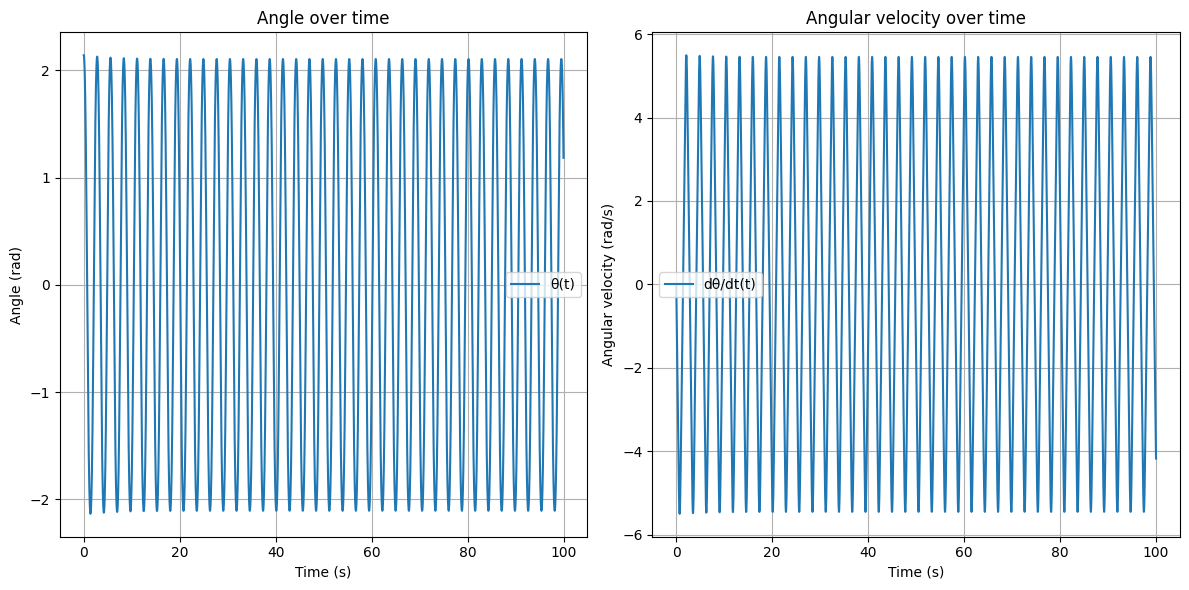

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
L_val = 1.0  # Length of the pendulum (in meters)
m_val = 1.0  # Mass of the pendulum (in kg)
g_val = 9.81  # Gravitational acceleration (in m/s^2)

# Equations of motion
def equations_of_motion(t, y):
    theta, theta_dot = y
    theta_ddot = -g_val / L_val * np.sin(theta)
    return [theta_dot, theta_ddot]

# Initial conditions (angle in radians and angular velocity in radians per second)
initial_angle = np.pi - 1  # Slightly less than upright position to give it a "push"
initial_angular_velocity = 0
initial_conditions = [initial_angle, initial_angular_velocity]

# Time span (start, end) and time steps for the solution
t_span = (0, 100)  # 10 seconds
t_eval = np.linspace(t_span[0], t_span[1], 5000)  # 500 time steps

# Solve the differential equation
solution = solve_ivp(equations_of_motion, t_span, initial_conditions, t_eval=t_eval)

# Extract the solution for theta (angle) and theta_dot (angular velocity)
angles = solution.y[0]
angular_velocities = solution.y[1]

# Plotting
plt.figure(figsize=(12, 6))

# Plot the angle over time
plt.subplot(1, 2, 1)
plt.plot(solution.t, angles, label='θ(t)')
plt.title('Angle over time')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.grid(True)
plt.legend()

# Plot the angular velocity over time
plt.subplot(1, 2, 2)
plt.plot(solution.t, angular_velocities, label='dθ/dt(t)')
plt.title('Angular velocity over time')
plt.xlabel('Time (s)')
plt.ylabel('Angular velocity (rad/s)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


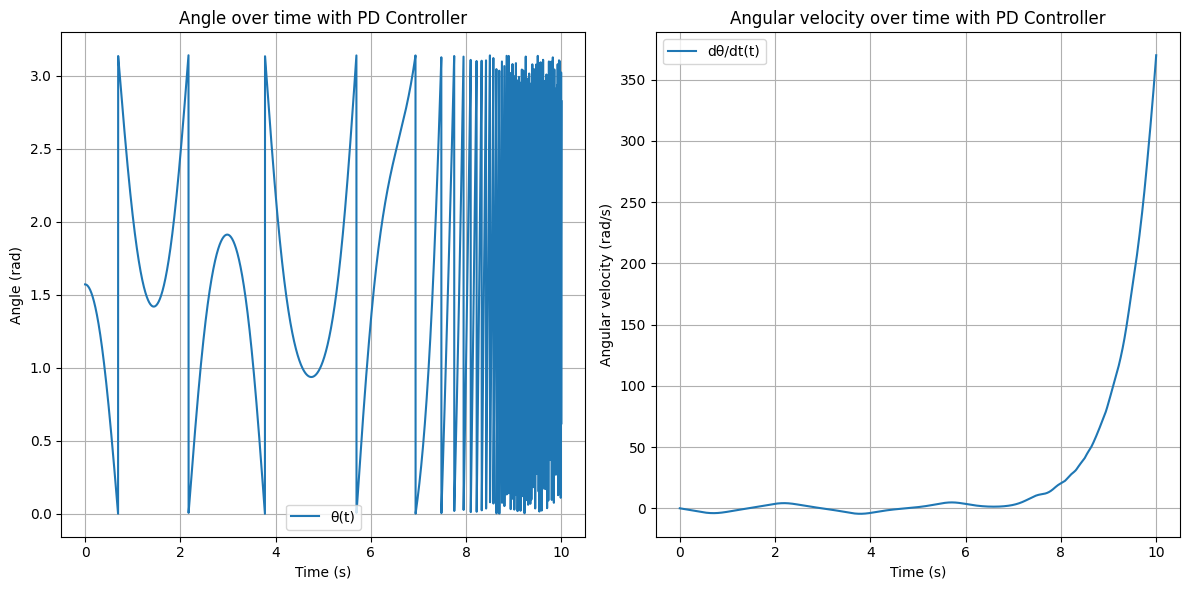

In [31]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
L_val = 1.0  # Length of the pendulum (in meters)
m_val = 1.0  # Mass of the pendulum (in kg)
g_val = 9.81  # Gravitational acceleration (in m/s^2)
K_p = 2.0  # Proportional gain
K_d = 0.1  # Derivative gain

# Equations of motion with PD controller
def controlled_equations_of_motion(t, y):
    theta, theta_dot = y
    u = K_p * theta + K_d * theta_dot  # PD control law
    theta_ddot = (-m_val * g_val * np.sin(theta) + u) / (m_val * L_val)
    return [theta_dot, theta_ddot]

# Initial conditions (angle in radians and angular velocity in radians per second)
initial_angle = np.pi/2  # Slightly less than upright position to give it a "push"
initial_angular_velocity = 0
initial_conditions = [initial_angle, initial_angular_velocity]

# Time span (start, end) and time steps for the solution
t_span = (0, 10)  # 10 seconds
t_eval = np.linspace(t_span[0], t_span[1], 5000)  # 500 time steps

# Solve the differential equation with the controller
solution = solve_ivp(controlled_equations_of_motion, t_span, initial_conditions, t_eval=t_eval)

# Extract the solution for theta (angle) and theta_dot (angular velocity)
angles = solution.y[0]
angular_velocities = solution.y[1]

# Plotting
plt.figure(figsize=(12, 6))

# Plot the angle over time
plt.subplot(1, 2, 1)
plt.plot(solution.t, angles%np.pi, label='θ(t)')
plt.title('Angle over time with PD Controller')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.grid(True)
plt.legend()

# Plot the angular velocity over time
plt.subplot(1, 2, 2)
plt.plot(solution.t, angular_velocities, label='dθ/dt(t)')
plt.title('Angular velocity over time with PD Controller')
plt.xlabel('Time (s)')
plt.ylabel('Angular velocity (rad/s)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


ValueError: x and y must have same first dimension, but have shapes (500,) and (499,)

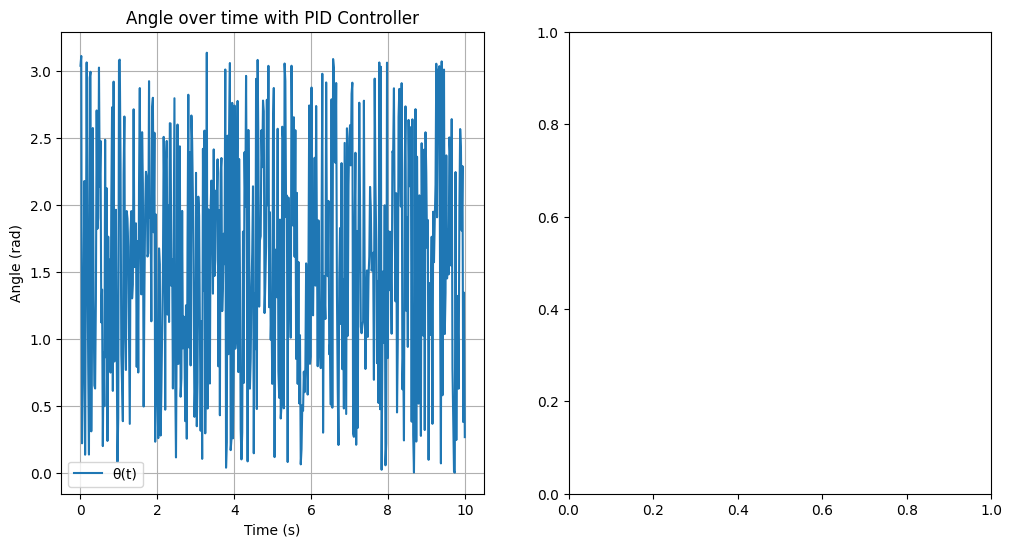

In [19]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
L_val = 1.0  # Length of the pendulum (in meters)
m_val = 1.0  # Mass of the pendulum (in kg)
g_val = 9.81  # Gravitational acceleration (in m/s^2)
K_p = 15.0  # Proportional gain
K_d = 0.0  # Derivative gain
K_i = 1.0  # Integral gain

integral_error = 0  # Initialize integral error

# Equations of motion with PID controller
def controlled_equations_of_motion(t, y):
    global integral_error
    theta, theta_dot = y
    integral_error += theta  # Update integral error
    u = K_p * theta + K_d * theta_dot + K_i * integral_error  # PID control law
    theta_ddot = (-m_val * g_val * np.sin(theta) + u) / (m_val * L_val)
    return [theta_dot, theta_ddot]

# Initial conditions (angle in radians and angular velocity in radians per second)
initial_angle = np.pi - 0.1  # Slightly less than upright position to give it a "push"
initial_angular_velocity = 0
initial_conditions = [initial_angle, initial_angular_velocity]

# Time span (start, end) and time steps for the solution
t_span = (0, 10)  # 10 seconds
t_eval = np.linspace(t_span[0], t_span[1], 500)  # 500 time steps

# Solve the differential equation with the controller
solution = solve_ivp(controlled_equations_of_motion, t_span, initial_conditions, t_eval=t_eval)

# Extract the solution for theta (angle) and theta_dot (angular velocity)
angles = solution.y[0]
angular_velocities = solution.y[1]

# Plotting
plt.figure(figsize=(12, 6))

# Plot the angle over time
plt.subplot(1, 2, 1)
plt.plot(solution.t, angles%np.pi, label='θ(t)')
plt.title('Angle over time with PID Controller')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.grid(True)
plt.legend()

# Plot the angular velocity over time
plt.subplot(1, 2, 2)
plt.plot(solution.t, angular_velocities, label='dθ/dt(t)')
plt.title('Angular velocity over time with PID Controller')
plt.xlabel('Time (s)')
plt.ylabel('Angular velocity (rad/s)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


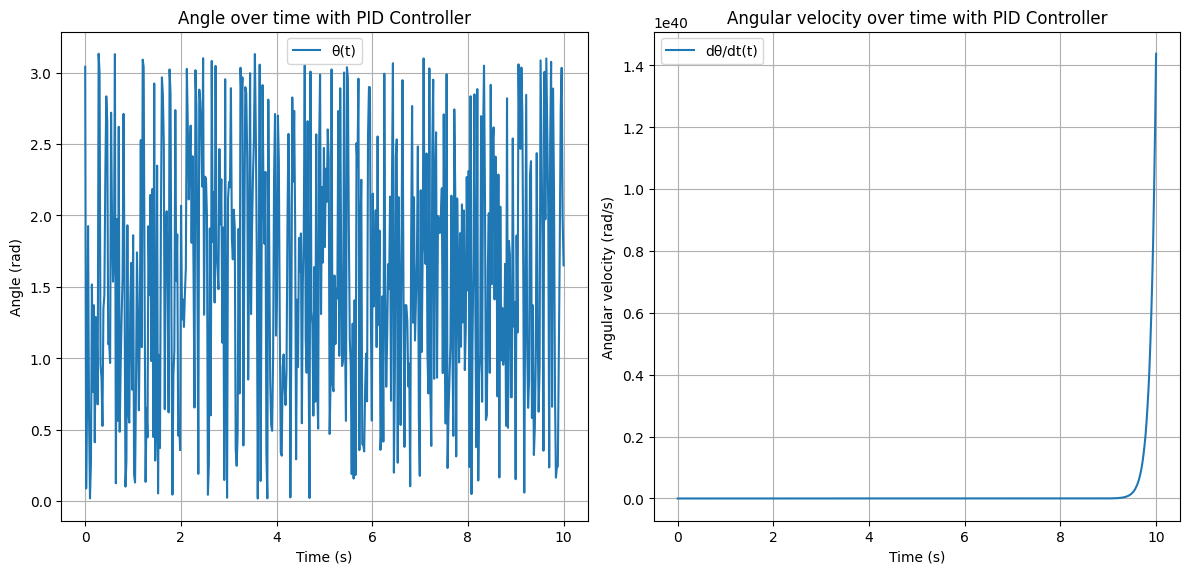

In [17]:
#inverse pendulum modelling
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
L_val = 1.0  # Length of the pendulum (in meters)
m_val = 1.0  # Mass of the pendulum (in kg)
g_val = 9.81  # Gravitational acceleration (in m/s^2)
K_p = 15.0  # Proportional gain
K_d = 5.0  # Derivative gain
K_i = 2.0  # Integral gain

integral_error = 0  # Initialize integral error

# Equations of motion with PID controller
def controlled_equations_of_motion(t, y):
    global integral_error
    theta, theta_dot = y
    integral_error += theta  # Update integral error
    u = K_p * theta + K_d * theta_dot + K_i * integral_error  # PID control law
    theta_ddot = (-m_val * g_val * np.sin(theta) + u) / (m_val * L_val)
    return [theta_dot, theta_ddot]

# Initial conditions (angle in radians and angular velocity in radians per second)
initial_angle = np.pi - 0.1  # Slightly less than upright position to give it a "push"
initial_angular_velocity = 0
initial_conditions = [initial_angle, initial_angular_velocity]

# Time span (start, end) and time steps for the solution

t_span = (0, 10)  # 10 seconds
t_eval = np.linspace(t_span[0], t_span[1], 500)  # 500 time steps

# Solve the differential equation with the controller
solution = solve_ivp(controlled_equations_of_motion, t_span, initial_conditions, t_eval=t_eval)

# Extract the solution for theta (angle) and theta_dot (angular velocity)
angles = solution.y[0]
angular_velocities = solution.y[1]

# Plotting
plt.figure(figsize=(12, 6))

# Plot the angle over time
plt.subplot(1, 2, 1)
plt.plot(solution.t, angles%np.pi, label='θ(t)')
plt.title('Angle over time with PID Controller')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.grid(True)
plt.legend()

# Plot the angular velocity over time
plt.subplot(1, 2, 2)
plt.plot(solution.t, angular_velocities, label='dθ/dt(t)')
plt.title('Angular velocity over time with PID Controller')
plt.xlabel('Time (s)')
plt.ylabel('Angular velocity (rad/s)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()



In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.linalg import solve_continuous_are

In [24]:
g = 9.81  # gravitational constant
l = 1.0  # length of pendulum
b = 0.1  # damping coefficient
m = 1.0  # mass of pendulum

A = np.array([[0, 1], [g/l, -b/m]])
B = np.array([[0], [1/m]])

In [25]:
Q = np.array([[1, 0], [0, 1]])
R = np.array([[1]])
inputs = []
P = solve_continuous_are(A, B, Q, R)
K = np.dot(np.linalg.inv(R), np.dot(B.T, P))

In [26]:
def system_dynamics(t, y, A, B, K):
    x = np.array(y).reshape(-1, 1)
    u = -np.dot(K, x)
    inputs.append(u[0][0])
    dx = np.dot(A, x) + np.dot(B, u)
    return dx.flatten()

initial_conditions = [0.1, 0]  # initial angle and angular velocity
t_span = (0, 10)
t_eval = np.linspace(*t_span, 1000)
inputs.clear()
sol = solve_ivp(system_dynamics, t_span, initial_conditions, t_eval=t_eval, args=(A, B, K))


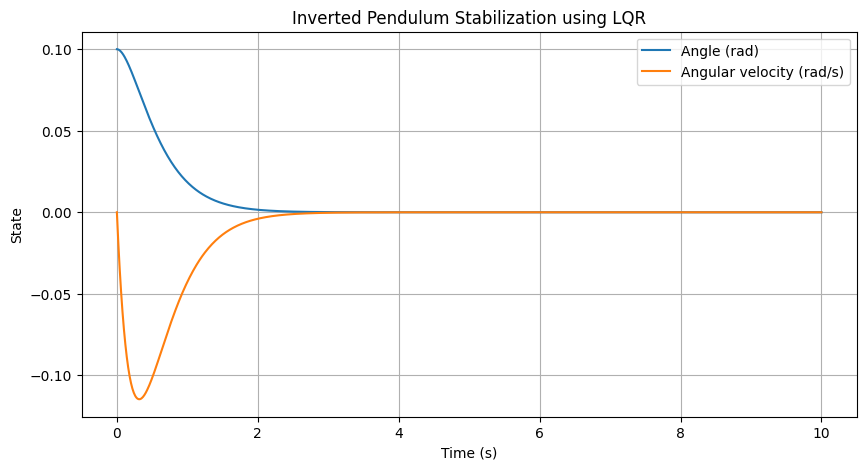

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(t_eval, sol.y[0], label='Angle (rad)')
plt.plot(t_eval, sol.y[1], label='Angular velocity (rad/s)')
# plt.plot(t_eval, inputs, label='Force (N)')
plt.xlabel('Time (s)')
plt.ylabel('State')
plt.legend()
plt.title('Inverted Pendulum Stabilization using LQR')
plt.grid(True)
plt.show()


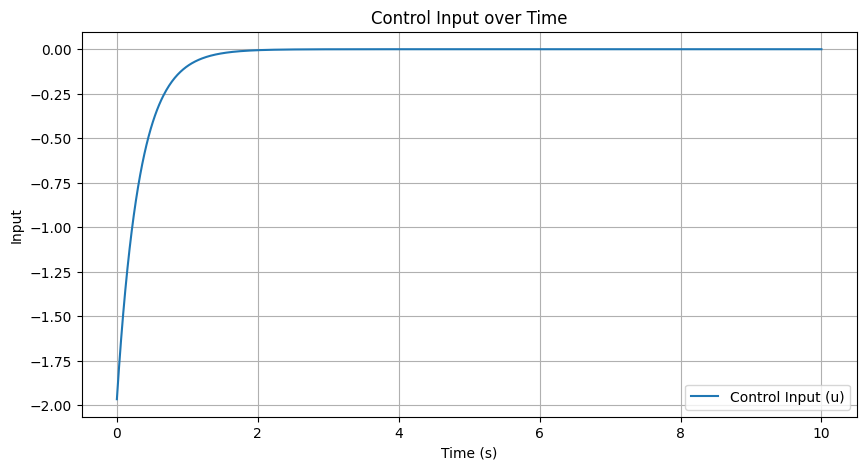

In [30]:
def compute_inputs(sol_y, K):
    inputs = []
    for i in range(sol_y.shape[1]):
        x = sol_y[:, i].reshape(-1, 1)
        u = -np.dot(K, x)
        inputs.append(u[0][0])
    return inputs

inputs = compute_inputs(sol.y, K)

plt.figure(figsize=(10, 5))
plt.plot(t_eval, inputs, label='Control Input (u)')
plt.xlabel('Time (s)')
plt.ylabel('Input')
plt.legend()
plt.title('Control Input over Time')
plt.grid(True)
plt.show()


In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


In [ ]:
theta = ctrl.Antecedent(np.linspace(-np.pi, np.pi, 500), 'theta')
theta_dot = ctrl.Antecedent(np.linspace(-10, 10, 500), 'theta_dot')
u = ctrl.Consequent(np.linspace(-10, 10, 500), 'u')


In [ ]:
theta.automf(names=['Negative', 'Zero', 'Positive'])
theta_dot.automf(names=['Negative', 'Zero', 'Positive'])
u.automf(names=['Negative', 'Zero', 'Positive'])


In [ ]:
rule1 = ctrl.Rule(theta['Positive'] & theta_dot['Positive'], u['Negative'])
rule2 = ctrl.Rule(theta['Negative'] & theta_dot['Negative'], u['Positive'])


In [ ]:
control_system = ctrl.ControlSystem([rule1, rule2])
fuzzy_controller = ctrl.ControlSystemSimulation(control_system)

def fuzzy_control(theta_val, theta_dot_val):
    fuzzy_controller.input['theta'] = theta_val
    fuzzy_controller.input['theta_dot'] = theta_dot_val
    fuzzy_controller.compute()
    return fuzzy_controller.output['u']


In [ ]:
def system_dynamics_with_fuzzy(t, y):
    theta_val, theta_dot_val = y
    u_val = fuzzy_control(theta_val, theta_dot_val)
    dx1 = theta_dot_val
    dx2 = (g/l)*np.sin(theta_val) - (b/m)*theta_dot_val + u_val/m
    return [dx1, dx2]

sol_fuzzy = solve_ivp(system_dynamics_with_fuzzy, t_span, initial_conditions, t_eval=t_eval)


In [3]:
def system_function_with_delay(X, t, R):
    # Check if t is less than R to handle initial conditions
    if t < R:
        delayed_input = X[0]  # Assuming X[0] is the initial value of X
    else:
        delayed_input = X[int(t - R)]
    
    Y = (4*R**2 + 4*R + 2) * delayed_input
    return Y


In [7]:
# Sample values
delta_t = 0.1
time_range = np.arange(0, 10, delta_t)
X_values = np.array(time_range)  
X_values[0] = 1
R = 1  # Delay of 2 units

Y_values = []
for t in range(len(time_range)):
    Y = system_function_with_delay(X_values, t, int(R/delta_t))
    Y_values.append(Y)


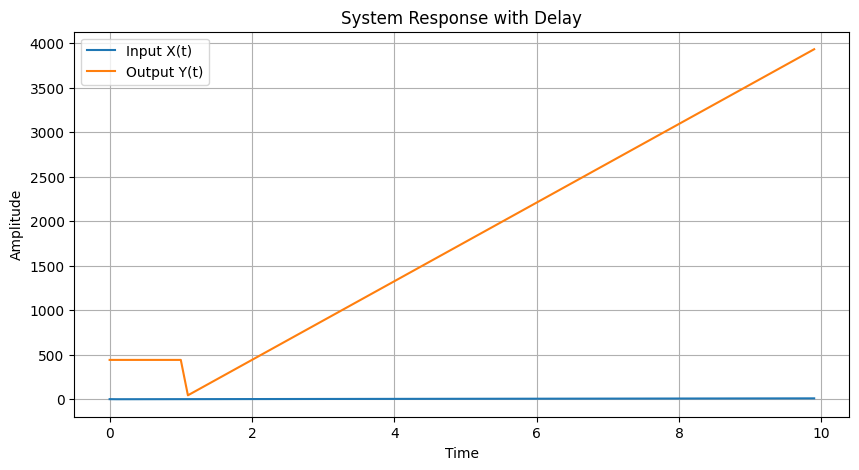

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(time_range, X_values, label='Input X(t)')
plt.plot(time_range, Y_values, label='Output Y(t)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('System Response with Delay')
plt.legend()
plt.grid(True)
plt.show()



2 s^2 + 4 s + 4
---------------
      s^2

[4.0000000e+00 4.0400004e+00 4.0800008e+00 ... 4.0039200e+03 4.0039600e+03
 4.0040000e+03]


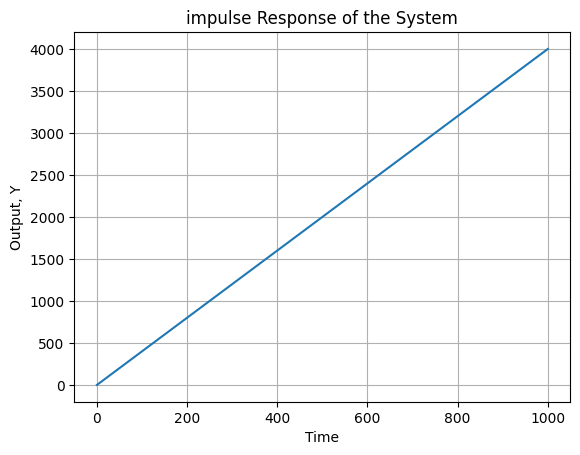

In [32]:
import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

# Define the transfer function
# H(s) = 4e^{-2s} + 4e^{-s} + 2
num = [2, 4, 4]
den = [1, 0, 0]  # Denominator is 1 for a system with no dynamics
y = np.zeros(100)
# s = ctrl.TransferFunction.s
# system = (4*np.exp(-2*s) + 4*np.exp(-s) + 2)
# Create the transfer function
system = ctrl.TransferFunction(num, den)
print(system)
# Time vector for simulation
t = np.linspace(0, 1000, 100000)
u = np.zeros(100)
u[0] = 1
# Simulate a step response
t,y = ctrl.impulse_response(system, T=t)
print(y)
# Plot the response
plt.plot(t, y)
# plt.plot(t,u)
plt.xlabel('Time')
plt.ylabel('Output, Y')
plt.title('impulse Response of the System')
plt.grid(True)
plt.show()
# u
